<Figure size 800x800 with 0 Axes>

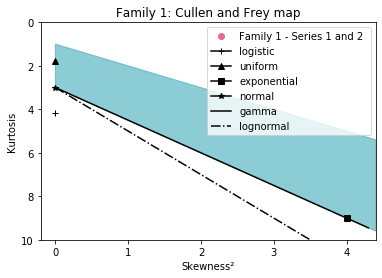

<Figure size 800x800 with 0 Axes>

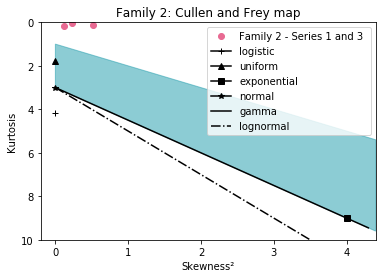

<Figure size 800x800 with 0 Axes>

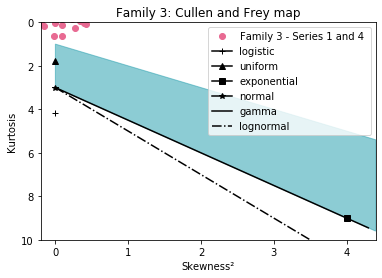

<Figure size 800x800 with 0 Axes>

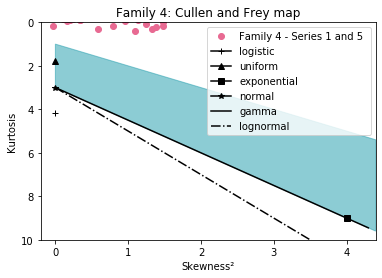

<Figure size 800x800 with 0 Axes>

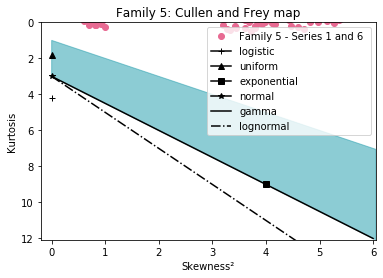

<Figure size 800x800 with 0 Axes>

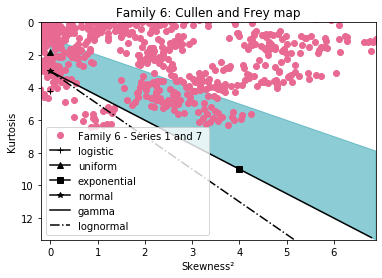

<Figure size 800x800 with 0 Axes>

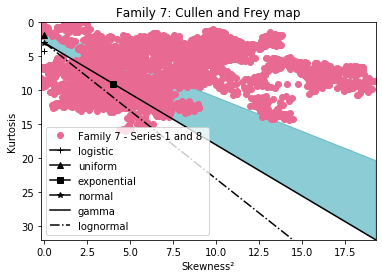

<Figure size 800x800 with 0 Axes>

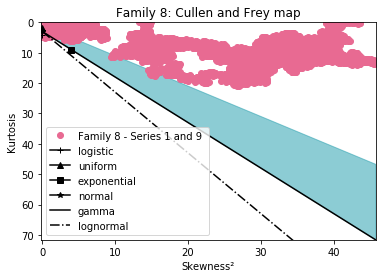

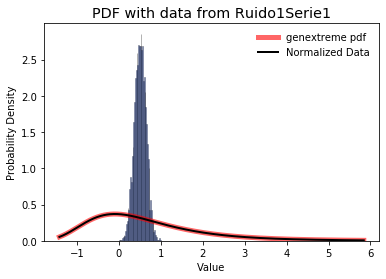

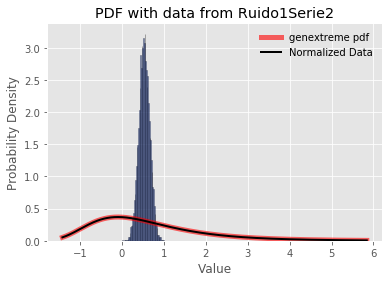

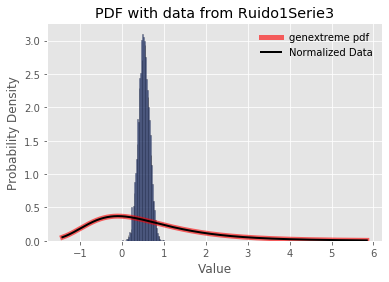

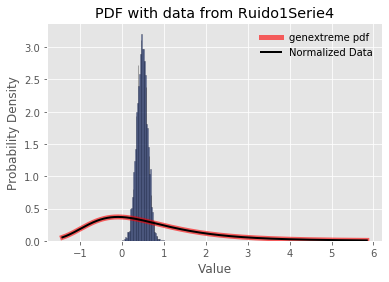

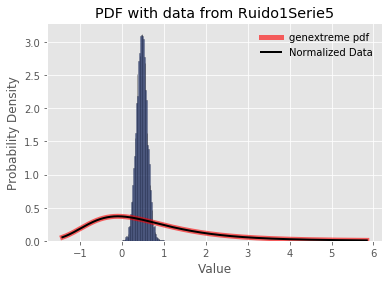

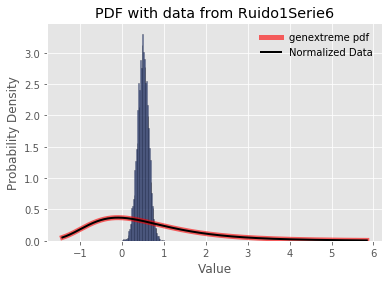

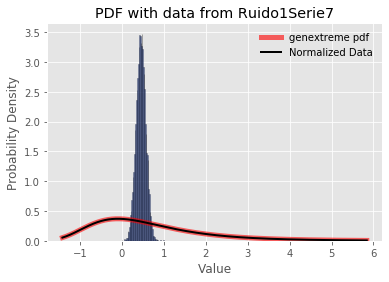

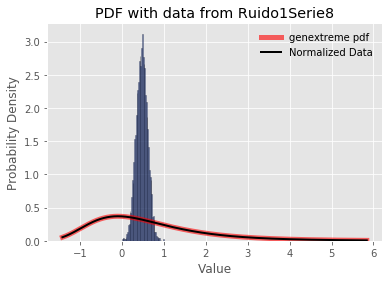

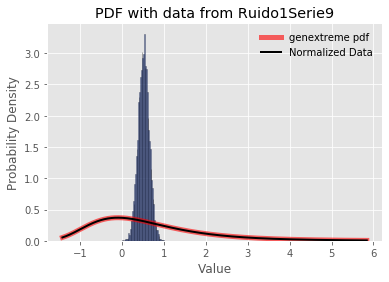

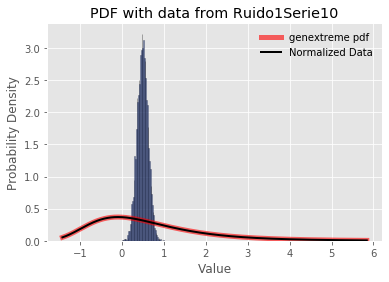

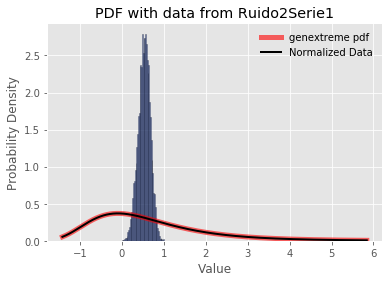

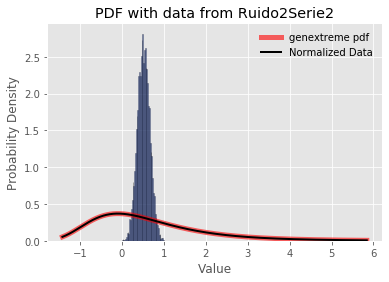

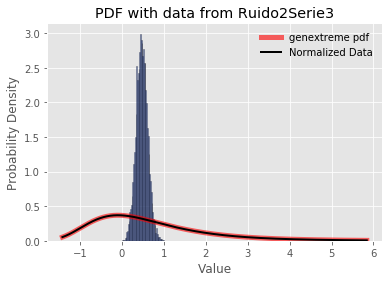

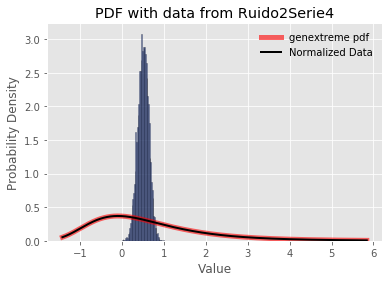

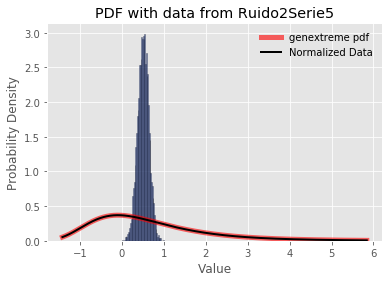

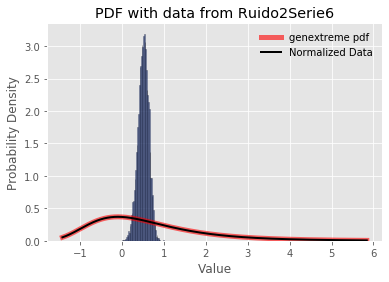

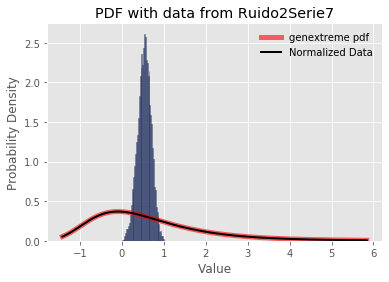

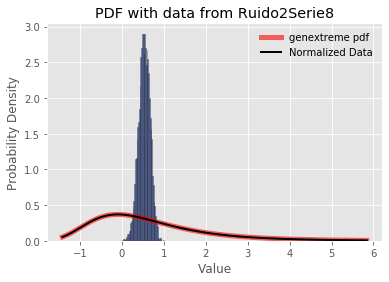

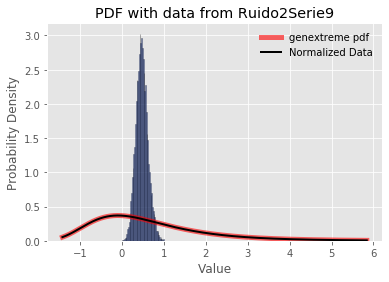

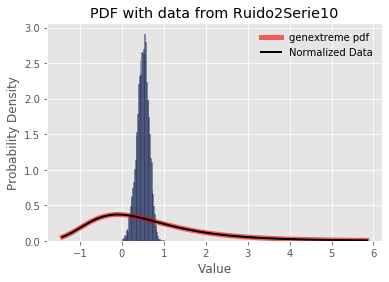

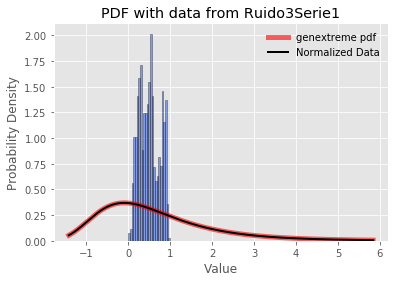

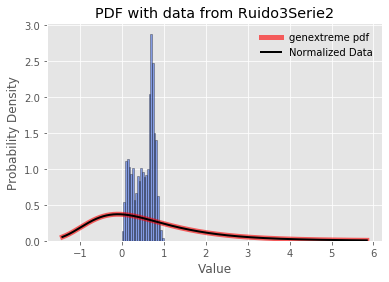

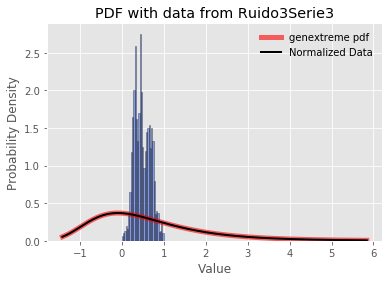

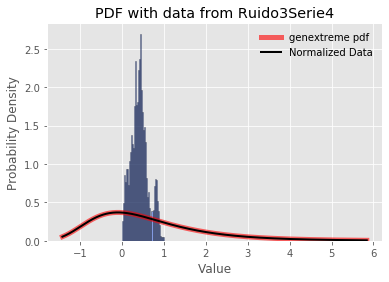

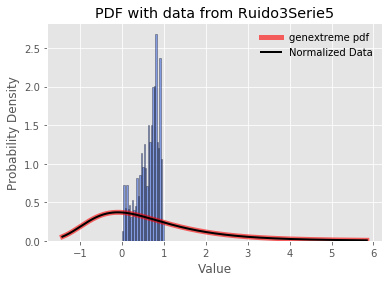

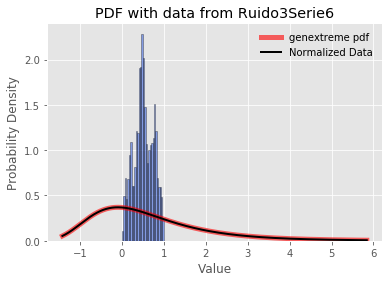

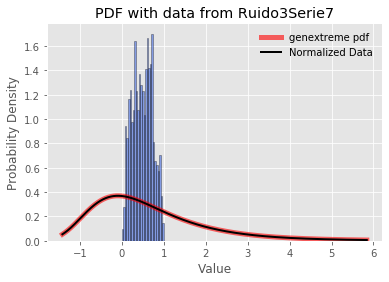

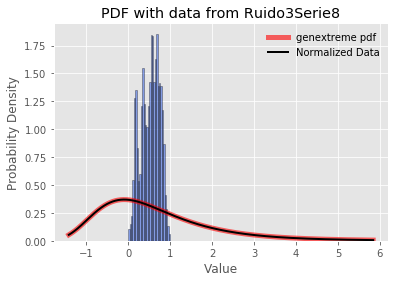

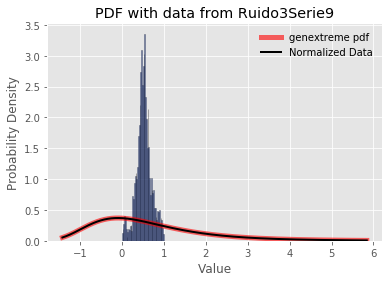

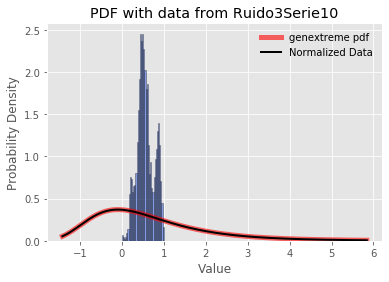

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm, genextreme

def cullenfrey(xd, yd, legend, title):
    plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
    fig, ax = plt.subplots()
    maior = max(xd)
    polyX1 = maior if maior > 4.4 else 4.4
    polyY1 = polyX1 + 1
    polyY2 = 3/2.*polyX1 + 3
    y_lim = polyY2 if polyY2 > 10 else 10

    x = [0, polyX1, polyX1, 0]
    y = [1, polyY1, polyY2, 3]
    scale = 1
    poly = Polygon(np.c_[x, y]*scale, facecolor='#1B9AAA', edgecolor='#1B9AAA', alpha=0.5)
    ax.add_patch(poly)
    ax.plot(xd, yd, marker="o", c="#e86a92", label=legend, linestyle='')
    ax.plot(0, 4.187999875999753, label="logistic", marker='+', c='black')
    ax.plot(0, 1.7962675925351856, label ="uniform", marker='^', c='black')
    ax.plot(4, 9, label="exponential", marker='s', c='black')
    ax.plot(0, 3, label="normal", marker='*', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 3/2. * np.arange(0, polyX1, 0.1) + 3, label="gamma", linestyle='-', c='black')
    ax.plot(np.arange(0, polyX1, 0.1), 2 * np.arange(0, polyX1, 0.1) + 3, label="lognormal", linestyle='-.', c='black')
    ax.legend()
    ax.set_ylim(y_lim, 0)
    ax.set_xlim(-0.2, polyX1)
    plt.xlabel("Skewness²")
    plt.title(title + ": Cullen and Frey map")
    plt.ylabel("Kurtosis")
    plt.savefig('Graficos Cullen_Frey/' + legend + " cullenfrey.png")
    plt.draw()

def plotPDF(dadoFamilia, titulo, filename):        
   
    fig, ax = plt.subplots(1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_data = scaler.fit_transform(pd.DataFrame(dadoFamilia))
    c = -0.1
    mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')
    x = np.linspace(genextreme.ppf(0.01, c), genextreme.ppf(0.99, c), len(scaled_data))

    plt.style.use("ggplot")
    ax.plot(x, genextreme.pdf(x, c),'r-', lw=5, alpha=0.6, label='genextreme pdf')

    rv = genextreme(c)
    ax.plot(x, rv.pdf(x), 'k-', lw=2, label='Normalized Data')

    vals = genextreme.ppf([0.001, 0.5, 0.999], c)
    resp = np.allclose([0.001, 0.5, 0.999], genextreme.cdf(vals, c))
    r = genextreme.pdf(c, scaled_data)

    plt.title("PDF with data from " + titulo)
    ax.hist(scaled_data, bins='auto', ec="k", density=True, alpha=0.6, color='royalblue')
    ax.legend(loc='best', frameon=False)
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.savefig('C:/Users/yurid/OneDrive/Documentos/jupyter/Lista/Cullen_frey/PDF/' + filename)
    plt.show()
    
    
def main():
    i = 0
    arq = 'C:/Users/yurid/OneDrive/Documentos/jupyter/Lista/Sinais Estocasticos/Arquivos/'

    for i in range(8):
        #arquivo = pd.read_csv(arq + '/Series Normalizadas/familia' + str(i+1) + '_normalizada.csv')
        arquivo = pd.read_csv(arq + 'familia' + str(i+1) + '.csv')
        p1 = arquivo['Serie 1']
        p2 = arquivo['Serie ' + str(i+2)]

        cullenfrey(p1, p2, "Family " + str(i+1) + " - Series 1 and " + str(i+2) + " ", "Family " + str(i+1))
        plt.show()
    
    i = 0
    j = 0
    arq = 'C:/Users/yurid/OneDrive/Documentos/jupyter/Lista/Colored Noise/Arquivos/'
    
    for i in range(3):
        for j in range(10):
            arquivo = pd.read_csv(arq + 'RuidoFrequencia' + str(i+1) + '.csv')
            p2 = arquivo['Serie ' + str(j+1)]

            plotPDF(p2, "Ruido" + str(i+1) + "Serie" + str(j+1), "Ruido" + str(i+1) + "Serie" + str(j+1)+".png")

main()